LEVEL 2 (INTERMEDIATE) TASK 3 CLUSTERING | UNSUPERVISED LEARNING

In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

DATA COLLECTION | CHURN BIG ML | CUSTOMER SEGMENTS

In [51]:
train = pd.read_csv("C:/Users/Samuel Raj/Downloads/Codveda/churn-bigml-80.csv")
test = pd.read_csv("C:/Users/Samuel Raj/Downloads/Codveda/churn-bigml-20.csv")
churn_Df = pd.concat([train, test], ignore_index=True)
churn_Df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
3329,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
3330,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
3331,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


DATA UNDERSTANDING

In [52]:
churn_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [53]:
churn_Df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


MISSING VALUE CHECK

In [54]:
churn_Df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

DUPLICATE CHECK

In [55]:
print("No Duplicates Found!" if churn_Df.shape[0] == churn_Df.drop_duplicates().shape[0]  else churn_Df.drop_duplicates()) 

No Duplicates Found!


OUTLIER DETECTION

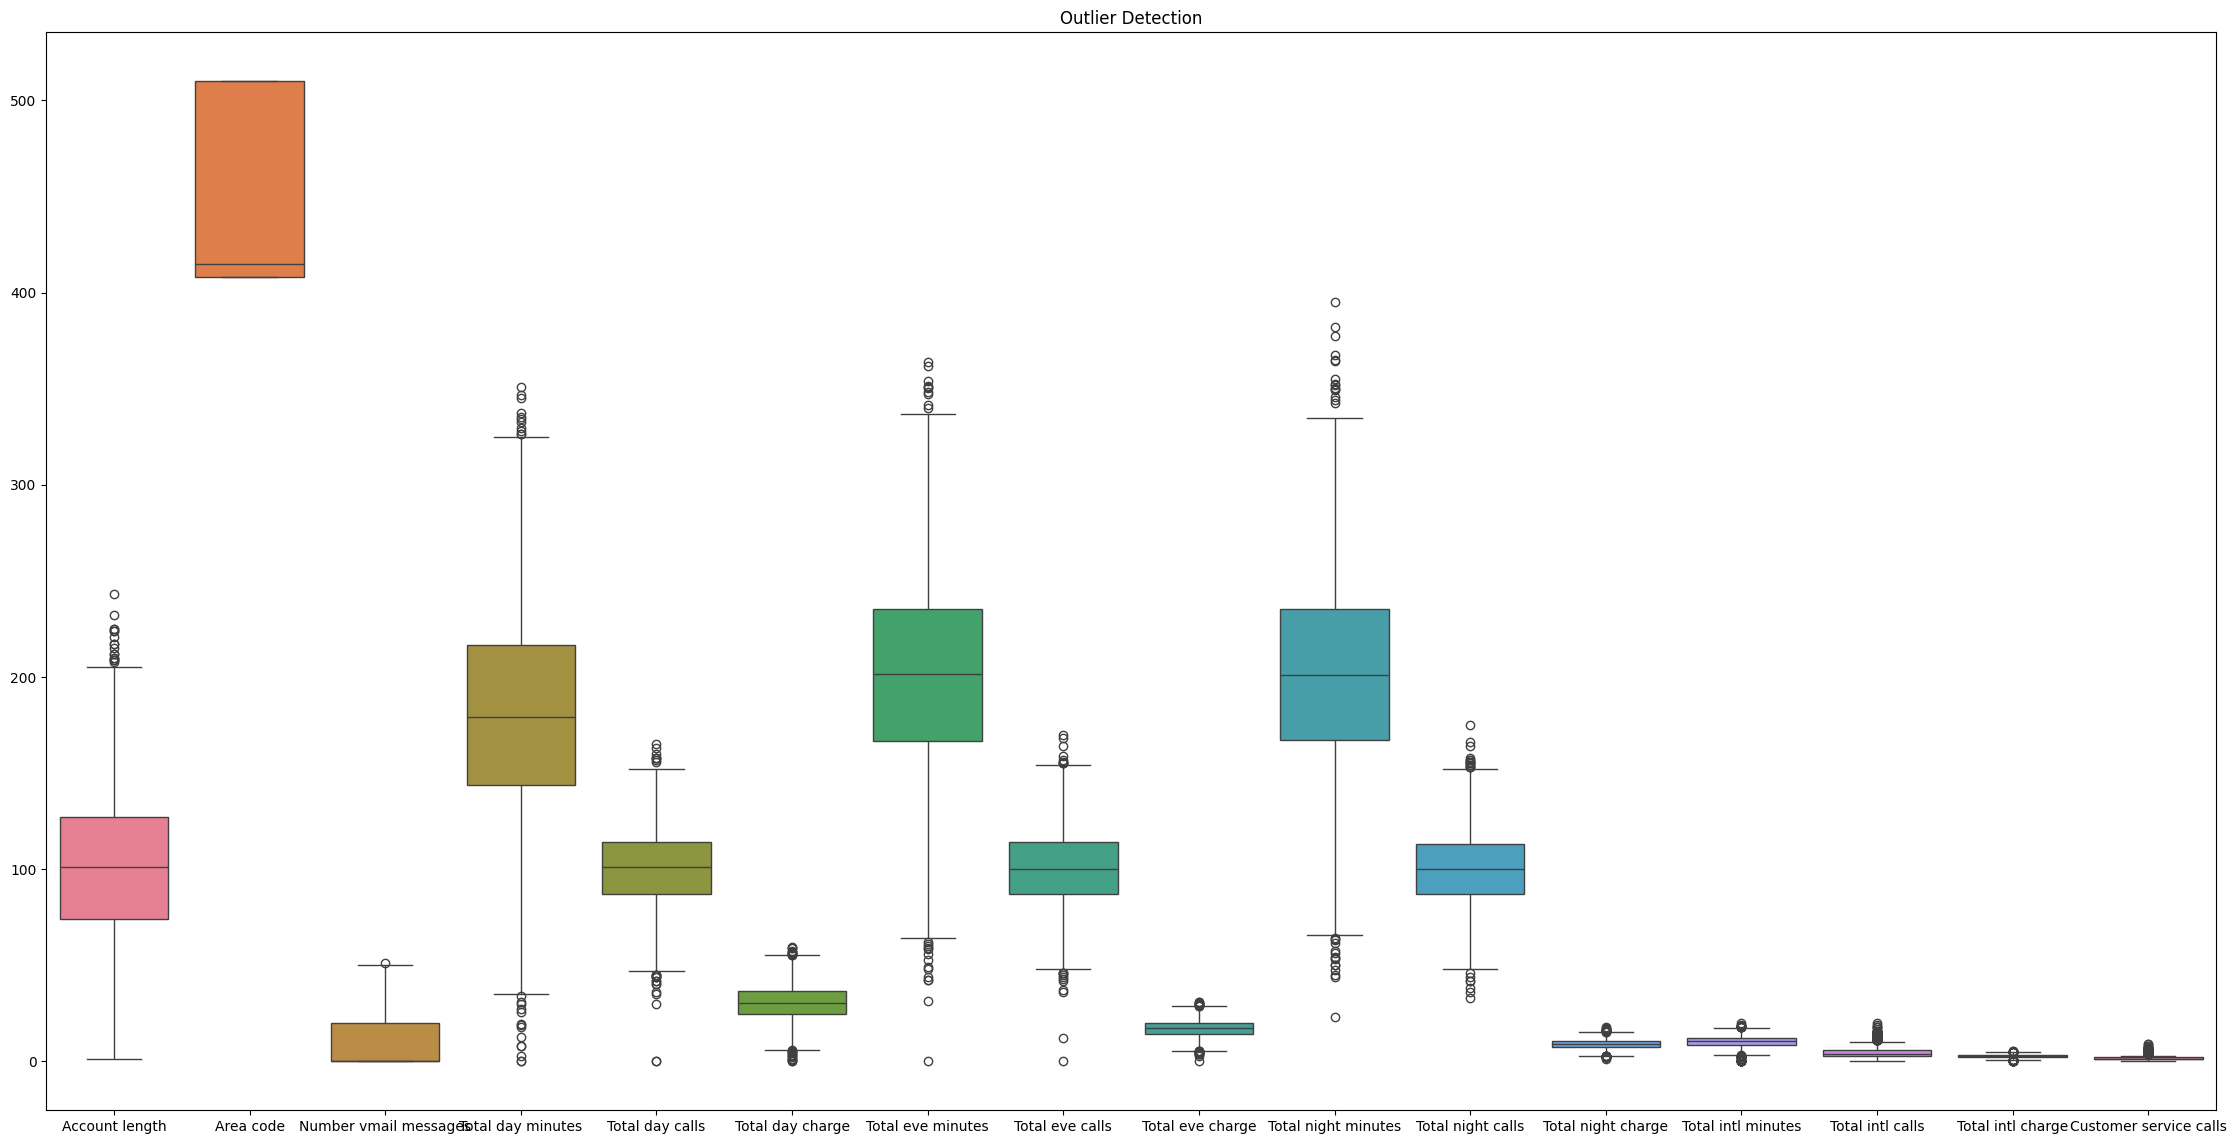

In [56]:
plt.figure(figsize=(28, 14))
numerical = churn_Df.select_dtypes(include='number')
sns.boxplot(data=numerical)
plt.title("Outlier Detection")
plt.show();

DATA CLEANING AND PREPROCESSING

In [57]:
drop_cols = ["State", "Area code", "Churn"]  
cleaned_churn = churn_Df.drop(columns=drop_cols)
cleaned_churn

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,114,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2
3329,106,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1
3330,60,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3
3331,159,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1


LABEL ENCODING FOR CATEGORICAL COLUMNS

In [58]:
for col in cleaned_churn.select_dtypes(include='object').columns:
    le = LabelEncoder()
    cleaned_churn[col] = le.fit_transform(cleaned_churn[col])
cleaned_churn

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,114,0,1,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2
3329,106,0,1,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1
3330,60,0,0,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3
3331,159,0,0,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1


STANDARDIZE NUMERICAL COLUMNS

In [59]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cleaned_churn)
pd.DataFrame(X_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.676489,-0.327580,1.617086,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932
1,0.149065,-0.327580,1.617086,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932
2,0.902529,-0.327580,-0.618396,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218
3,-0.428590,3.052685,-0.618396,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354
4,-0.654629,3.052685,-0.618396,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0.324873,-0.327580,1.617086,1.307948,-0.783616,-0.619735,-0.783352,-0.892994,1.249304,-0.894089,0.924094,-0.312165,0.923158,0.452353,1.024263,0.458322,0.332354
3329,0.123950,-0.327580,1.617086,1.527146,-1.766002,1.523186,-1.766281,0.057580,1.550515,0.057183,0.566148,-1.385473,0.567197,-0.765665,-0.601195,-0.762389,-0.427932
3330,-1.031361,-0.327580,-0.618396,-0.591760,0.259367,0.875326,0.258985,-2.287299,0.496279,-2.286193,0.182492,1.732232,0.180474,1.061361,1.430627,1.055408,1.092641
3331,1.455068,-0.327580,-0.618396,-0.591760,-0.183166,0.675985,-0.182793,-0.064693,0.245270,-0.065786,-0.141834,-0.925484,-0.140330,0.488177,-0.194831,0.484859,-0.427932


ELBOW AND SILHOUETTE TO APPLY K-MEANS CLUSTERING

In [60]:
wcss = []
silhouettes = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    preds = kmeans.fit_predict(X_scaled)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, preds))
pd.concat([pd.DataFrame(wcss).T,pd.DataFrame(silhouettes).T],ignore_index=True)

,0,1,2,3,4,5,6,7,8
0,50269.816044,47068.552689,44641.942617,42645.071570,41104.262123,39806.921271,38802.058516,38013.219175,37395.512593
1,0.142976,0.091622,0.095835,0.085969,0.080950,0.078997,0.076937,0.071693,0.073908


ELBOW PLOT

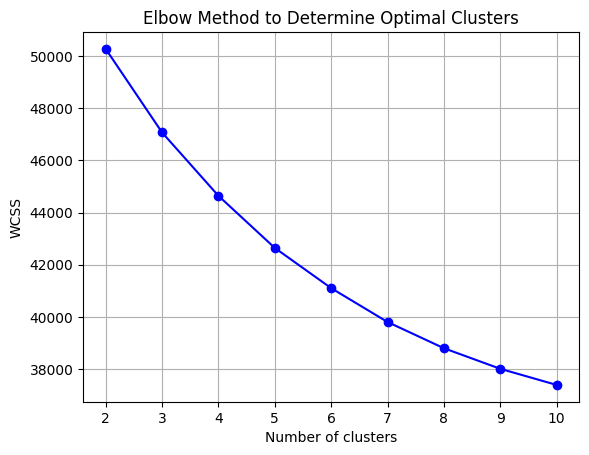

In [61]:
plt.plot(k_range, wcss, marker="o", color="blue")
plt.title("Elbow Method to Determine Optimal Clusters")
plt.xlabel("Number of clusters"); plt.ylabel("WCSS"); plt.grid(True)
plt.show();

SILHOUETTE PLOT

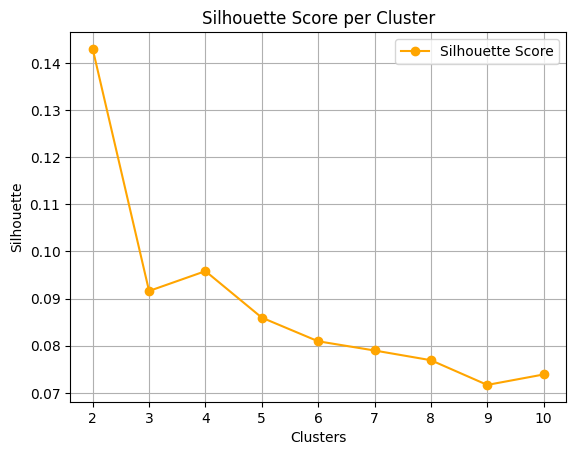

In [62]:
plt.plot(k_range, silhouettes, marker="o", color="orange", label="Silhouette Score")
plt.title("Silhouette Score per Cluster")
plt.xlabel("Clusters"); plt.ylabel("Silhouette")
plt.grid(); plt.legend()
plt.show();

APPLYING FINAL K-MEANS CLUSTER

In [63]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
churn_Df["Cluster"] = kmeans.fit_predict(X_scaled)
churn_Df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Cluster
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,1
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,2
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,...,13.23,247.6,94,11.14,11.5,7,3.11,2,False,0
3329,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,...,17.33,229.5,73,10.33,8.1,3,2.19,1,False,0
3330,VT,60,415,No,No,0,193.9,118,32.96,85.0,...,7.23,210.1,134,9.45,13.2,8,3.56,3,False,1
3331,WV,159,415,No,No,0,169.8,114,28.87,197.7,...,16.80,193.7,82,8.72,11.6,4,3.13,1,False,1


PCA VISUALIZATION

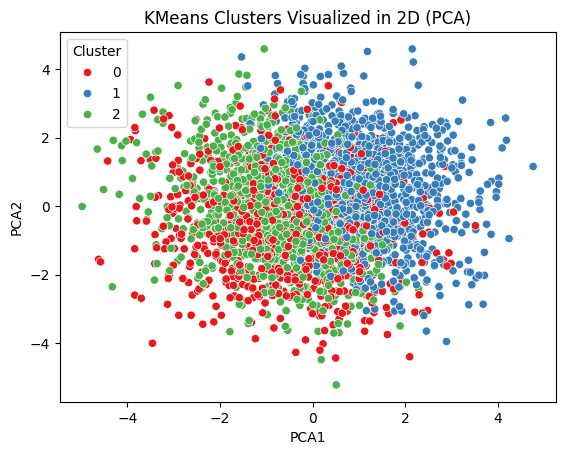

In [64]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(X_scaled)
sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=churn_Df["Cluster"], palette="Set1")
plt.title("KMeans Clusters Visualized in 2D (PCA)"); plt.xlabel("PCA1"); plt.ylabel("PCA2")
plt.show();

T-SNE VISUALIZATION

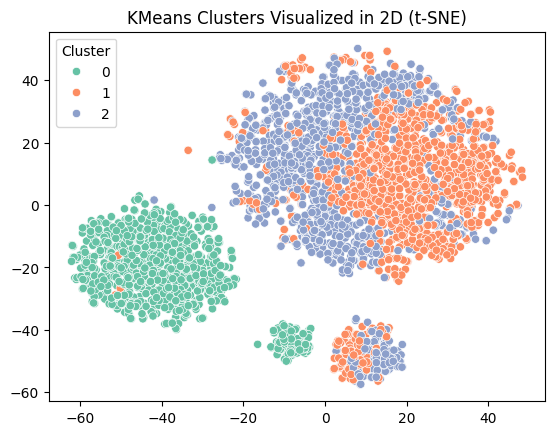

In [65]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(X_scaled)
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=churn_Df["Cluster"], palette="Set2")
plt.title("KMeans Clusters Visualized in 2D (t-SNE)")
plt.show();

CLUSTER V/S CHURN (INSIGHTS)

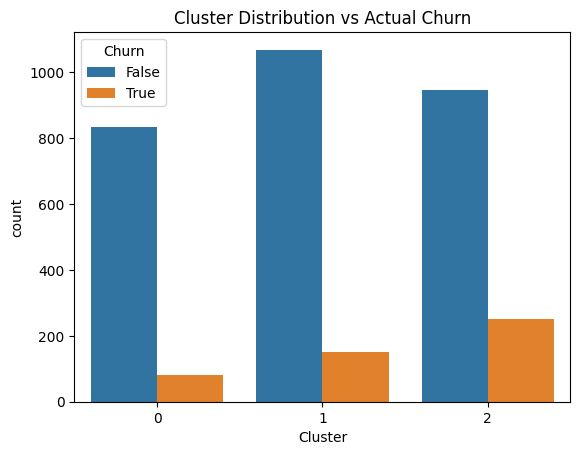

In [66]:
sns.countplot(data=churn_Df, x="Cluster", hue="Churn")
plt.title("Cluster Distribution vs Actual Churn")
plt.show();

CHURN AND ITS CLUSTER CORRELATION

C:\Users\Samuel Raj\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


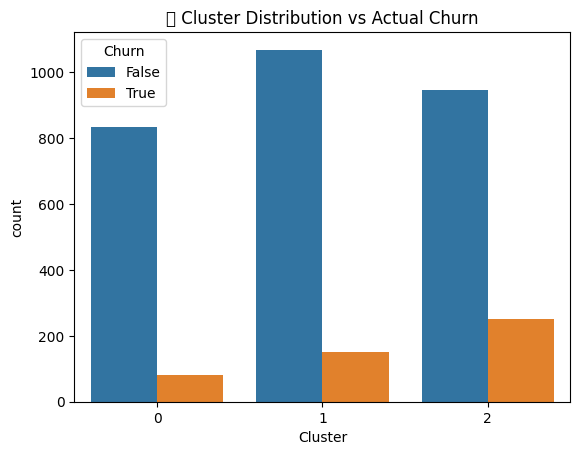

In [67]:
sns.countplot(data=churn_Df, x="Cluster", hue="Churn")
plt.title("🧩 Cluster Distribution vs Actual Churn")
plt.show()

INSIGHTS

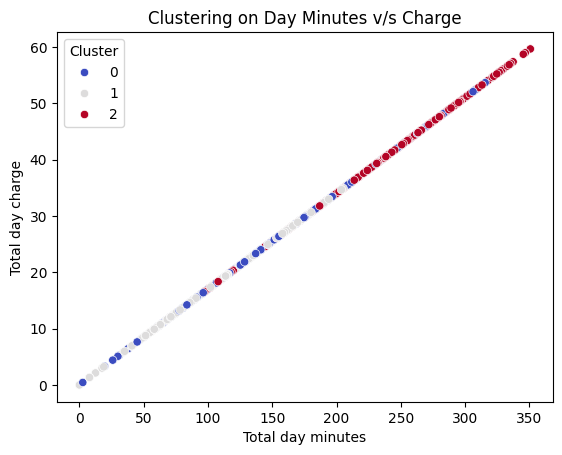

In [68]:
sns.scatterplot(data=churn_Df, x="Total day minutes", y="Total day charge", hue="Cluster", palette="coolwarm")
plt.title("Clustering on Day Minutes v/s Charge")
plt.show();

- 3 clusters are optimal for customer grouping
- Scaling features improves K-Means performance
- PCA and t-SNE effectively visualize these clusters
- The clusters align with churn patterns, enabling targeted retention strategies
- K-Means successfully identifies meaningful customer segments without labeled data.